In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Uploading the CSV File:
df= pd.read_csv("D:\EXCEL FILES\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding= 'unicode_escape')

In [3]:
#Checking the Table:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Getting the all the information of the table:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#Deleting the unwanted columns:
df.drop(['Status','unnamed1'], axis =1, inplace = True)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
#Checking the NUll Values:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#Deleting the NUll Values:
df.dropna(inplace=True)

In [9]:
df['Amount']= df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

# EDA:

In [10]:
#Descriptive Stats:
df[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


# Gender:

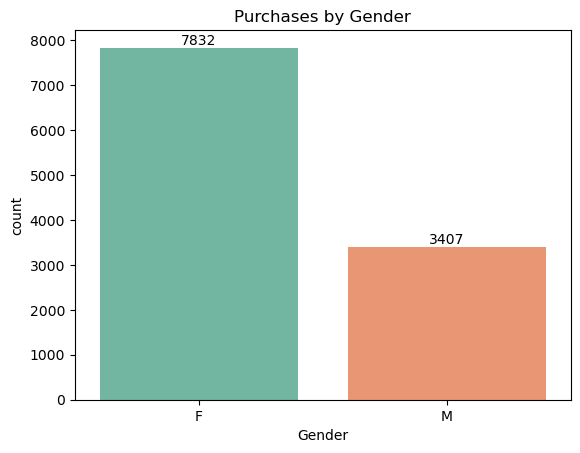

In [11]:
#Purchases by Gender:
ax= sns.countplot(x="Gender", data = df, 
                  hue = "Gender", palette= 'Set2')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Purchases by Gender")

In [12]:
 #Total amount of Purchases done by Male and Female:
salesbygen= df.groupby(['Gender'],
                       as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
salesbygen

,Gender,Amount
0,F,74335853
1,M,31913276


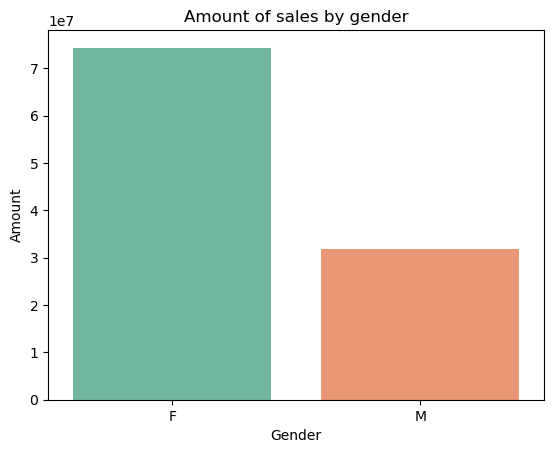

In [13]:
#Chart of the above expression:
sns.barplot(x= 'Gender', y= 'Amount', hue= 'Gender',palette= 'Set2', data= salesbygen)
plt.title("Amount of sales by gender")
plt.show()

From the above graphs we can come to the conclusion that Females have made more number of purchases then men.

# Age group:

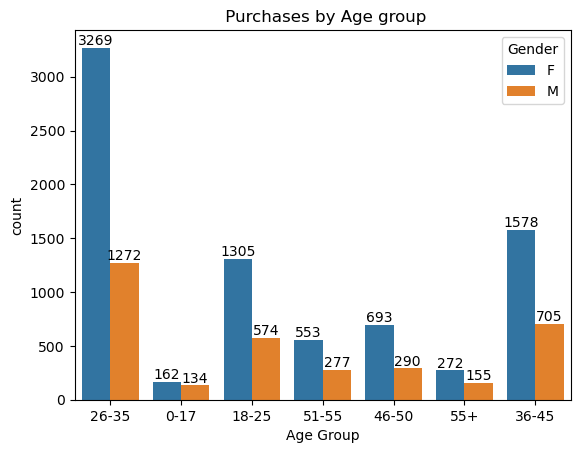

In [14]:
#Let's make a graph for the sales from each age-groups
ax= sns.countplot(x= 'Age Group', hue = 'Gender' ,data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(' Purchases by Age group')
plt.show()

In [15]:
#Total amount of Purchases done by each age-group:
salesbyage= df.groupby(['Age Group'],
                       as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
salesbyage

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


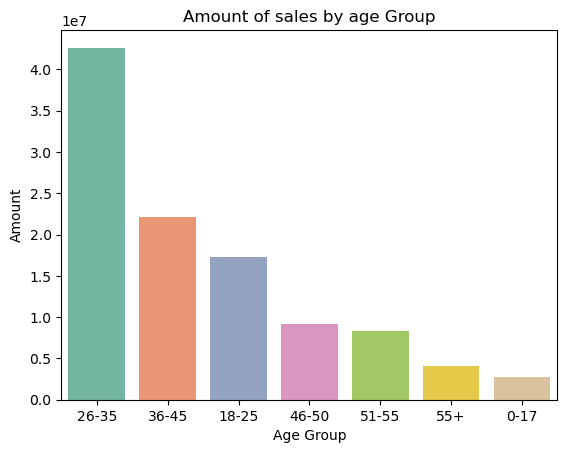

In [16]:
#Chart of the above expression:
a=sns.barplot(x= 'Age Group', y= 'Amount',hue = 'Age Group', palette= 'Set2', data = salesbyage)
plt.title("Amount of sales by age Group")
plt.show()

From the above graph we gwt the insight that the most amount of and numbers of purchases are done by the age group between 26-35 and gender is Female.

# Age:

In [17]:
order= df.groupby(['State'],
as_index= False)['Orders'].sum().sort_values(by='Orders',ascending =False)
order

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


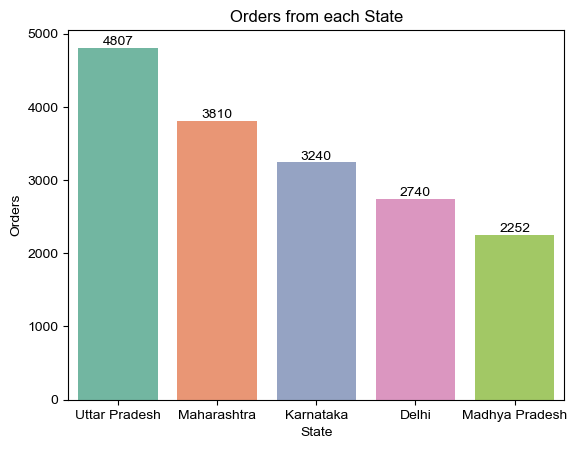

In [18]:
# Countplot for orders from each State:
a = sns.barplot(x= 'State', y= 'Orders',hue = 'State', palette= 'Set2', data=order.head())
for bars in a.containers:
        a.bar_label(bars)
sns.set(rc={'figure.figsize':(15,5)})
plt.title("Orders from each State")
plt.show()


In [19]:
# Total Amount of orders by states (top 5):
statesorder= df.groupby(['State'],
                       as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
statesorder.head()

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


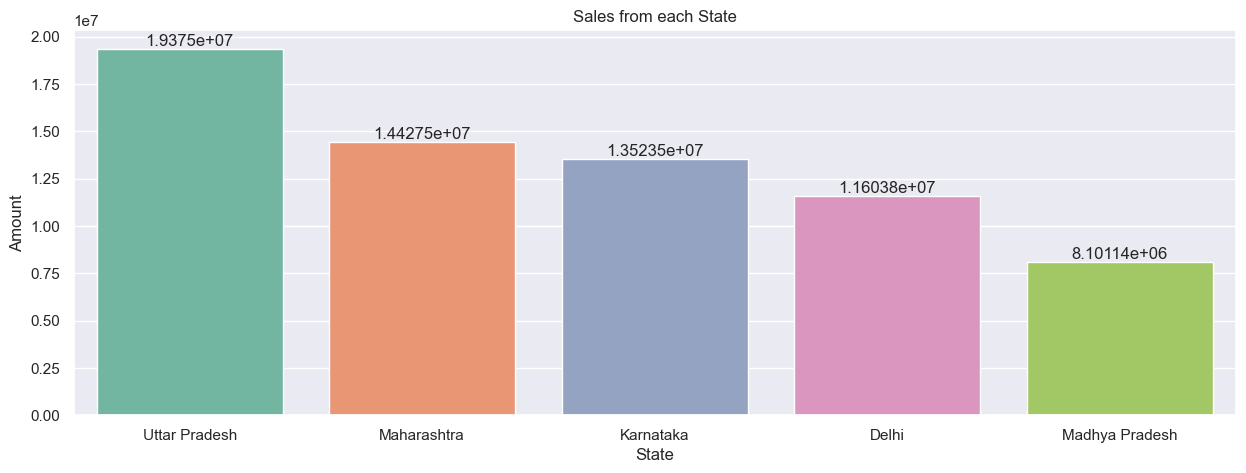

In [20]:
#  Bar Graph for total Amount of orders by states (top 5):
a= sns.barplot(x= 'State',y= 'Amount', hue= 'State', palette= 'Set2', data= statesorder.head())
sns.set(rc={'figure.figsize':(15,5)})
for bars in a.containers:
    a.bar_label(bars)
plt.title("Sales by State")
plt.title("Sales from each State")
plt.show()

Most of the Orders and Amount we are getting are from UP, Maharashtra and karnataka.

# Category:

In [21]:
#Orders according to the Product Category(top5):
o= df.groupby(['Product_Category'],
                       as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending= False)
o.head()

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331


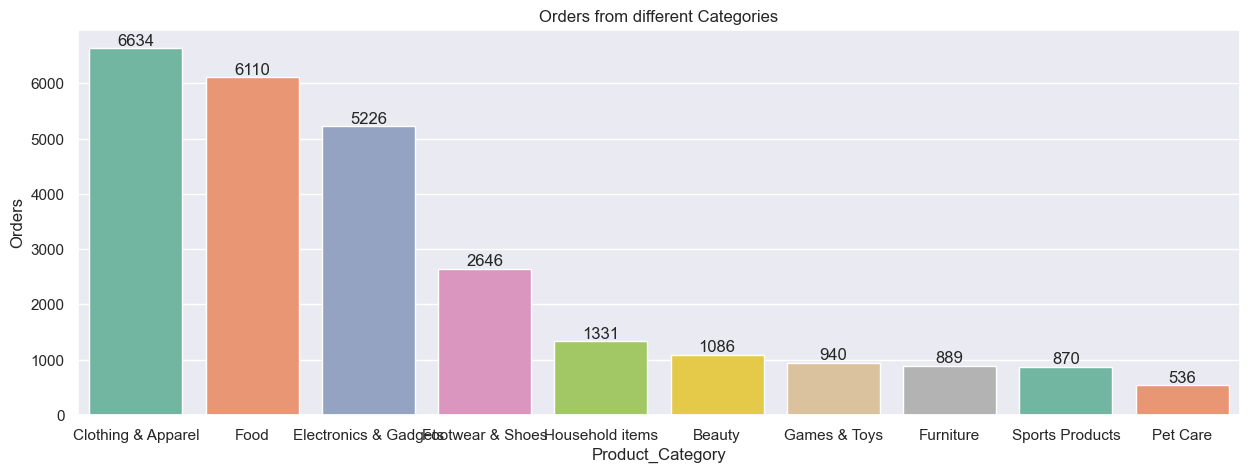

In [22]:
#Graph(Top5):
a=sns.barplot(x= 'Product_Category', y= 'Orders',hue = 'Product_Category', palette= 'Set2',data= o.head(10))
for bars in a.containers:
    a.bar_label(bars)
plt.title("Orders from different Categories")
plt.show()

In [23]:
#Amount of sales from Category(Top5):
sales= df.groupby(["Product_Category"],
                                    as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)
sales.head()

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


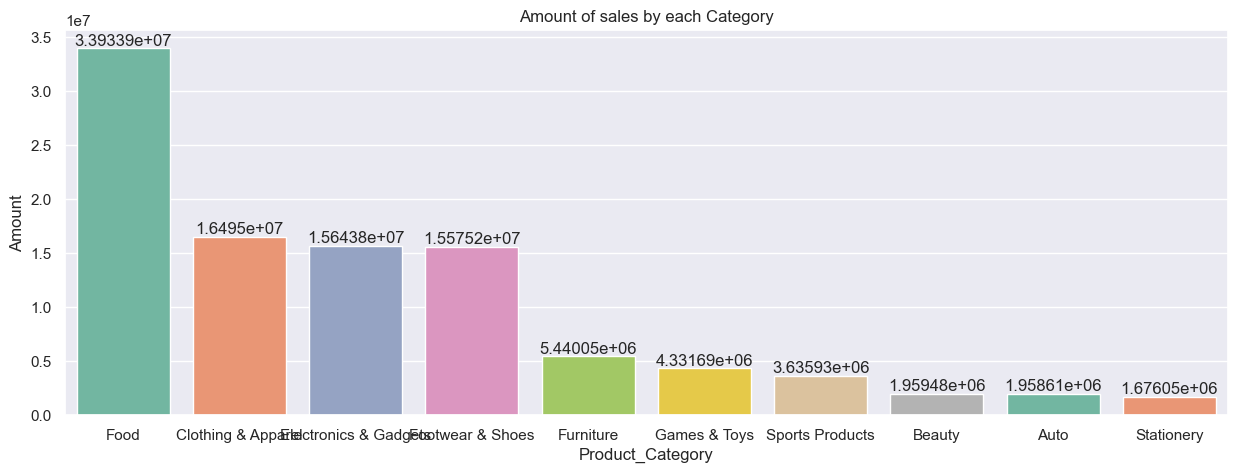

In [24]:
a= sns.barplot(x= "Product_Category", y= "Amount",hue = 'Product_Category', palette= 'Set2', data= sales.head(10))
sns.set(rc={'figure.figsize':(20,5)})
for bars in a.containers:
    a.bar_label(bars)
plt.title("Amount of sales by each Category")
plt.show()

As per the data "Food" is the number one category in terms of Sales but the most number of orders are coming from "Clothing".

# Top Customer :
    

In [20]:
a= df.groupby(['Cust_name'], 
              as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)
a.head()

,Cust_name,Amount
1196,Vishakha,382782.0
1102,Sudevi,287142.0
1185,Vasudev,281034.0
800,Neola,275234.0
28,Alejandro,272517.0


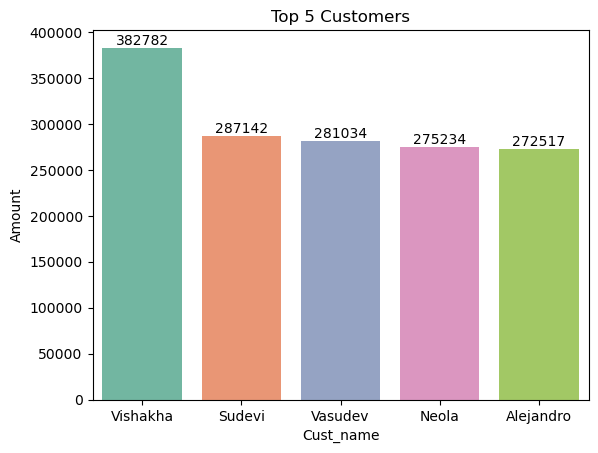

In [19]:
#Graph:
b= sns.barplot(x= 'Cust_name', y='Amount', hue= 'Cust_name',
               palette= 'Set2', data= a.head())
for bars in b.containers:
    b.bar_label(bars)
plt.title("Top 5 Customers")
plt.show()

"Vishaka" is the customers with the maximum amount of purchases done.

# Zone:

Text(0.5, 1.0, 'Sales according to Zones')

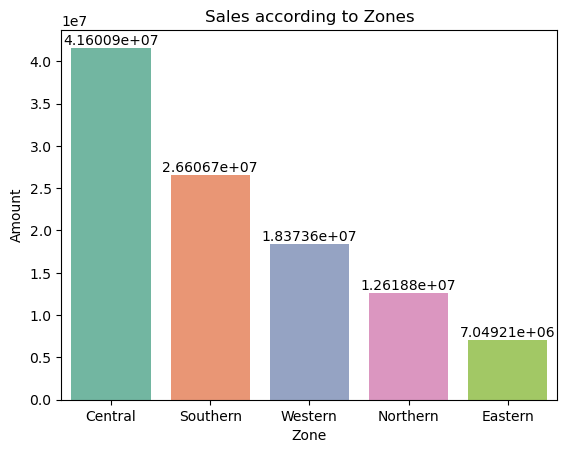

In [28]:
a= df.groupby(['Zone'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
b= sns.barplot(x= 'Zone',y='Amount', hue= 'Zone', palette= 'Set2', data= a)
for bars in b.containers:
    b.bar_label(bars)
plt.title("Sales according to Zones")

Central Zone is the leading Zone in terms of sales.